# **Task 3 - Sales Prediction using Python**
*(by Anushka Gupta)*

# **Steps :-**
1. Loading data
2. Exploratory data analysis
3. Data pre-processing
4. Data vizualization
5. Modelling
    * by Linear regression
    * by Multi Linear regression   

# **1. Loadinng the data**

In [1]:
# Import required libraries

import numpy as np
import pandas as pd

#data viz
import matplotlib.pyplot as plt
import seaborn as sns

#model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the dataset
sales =pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")

# **2. Data Exploaration**

In [3]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# **3. Data Pre-processing**

In [6]:
#checking of missing values
sales.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
sales.shape

(200, 5)

* **Cleaning**

In [8]:
sales= sales.drop(columns=['Unnamed: 0'])

* **Transforming**

In [9]:
sales['TV']=sales['TV'].astype('int')

In [10]:
sales['Newspaper']=sales['Newspaper'].astype('int')

In [11]:
sales['Radio']=sales['Radio'].astype('int')

In [12]:
sales.head(10)

,TV,Radio,Newspaper,Sales
0,230,37,69,22.1
1,44,39,45,10.4
2,17,45,69,9.3
3,151,41,58,18.5
4,180,10,58,12.9
5,8,48,75,7.2
6,57,32,23,11.8
7,120,19,11,13.2
8,8,2,1,4.8
9,199,2,21,10.6


# **4. Data Visualization**

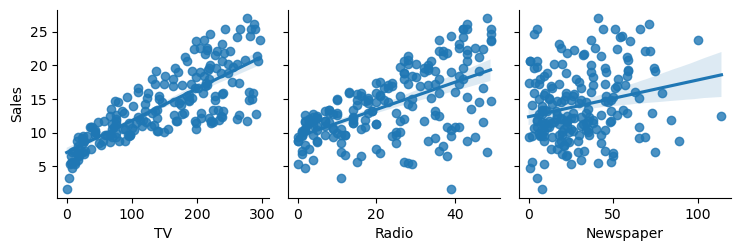

In [13]:
 #linearity (linear relationship)
sns.pairplot(sales,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

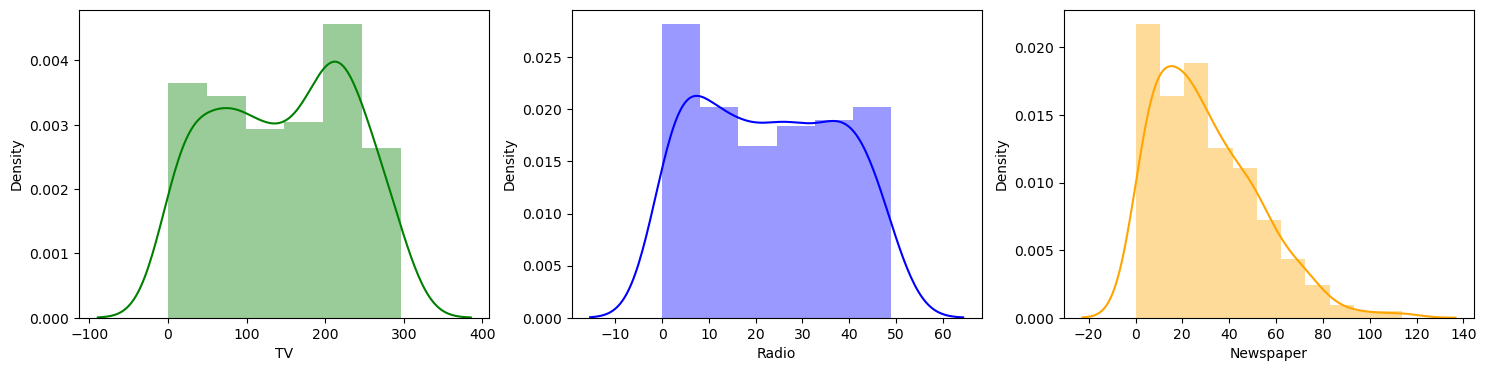

In [14]:
#Normality
####Performing univariate analyasis

plt.rcParams['figure.figsize']=(18,4)

plt.subplot(1,3,1)
sns.distplot(sales['TV'],color='green')

plt.subplot(1,3,2)
sns.distplot(sales['Radio'],color='blue')

plt.subplot(1,3,3)
sns.distplot(sales['Newspaper'],color='orange')

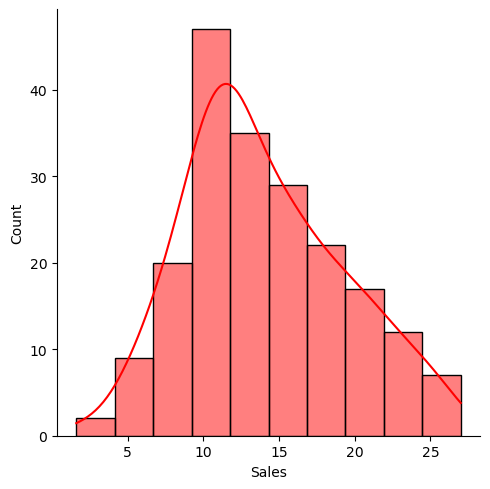

In [15]:
#Normality (outcome variable(y) to be normally distributed)
sns.displot(sales.Sales,bins=10,color='red',kde=True)

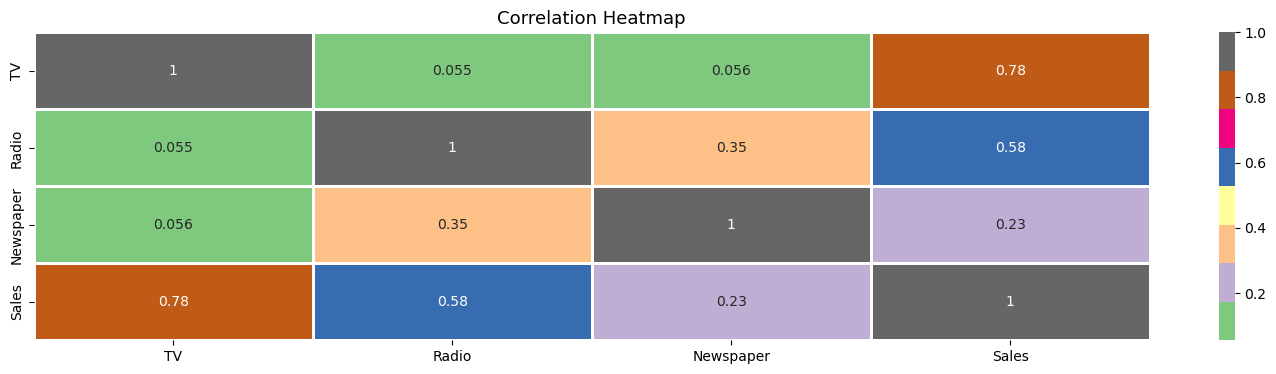

In [16]:
#Mutlicolinearity
###Performing Multivariate Analyasis

sns.heatmap(sales.corr(),annot=True,linewidth=1,cmap='Accent')
plt.title('Correlation Heatmap',fontsize=13)
plt.show()

As we can see the 3 variables not correlated with each other

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
r = sales[["TV", "Radio","Newspaper","Sales"]].values
vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(r, i) for i in range(4)]
vif_df["feature"] = ["TV", "Radio","Newspaper","Sales"]
vif_df

,VIF,feature
0,22.844235,TV
1,12.100093,Radio
2,3.099149,Newspaper
3,53.957740,Sales


# **5. Modelling our dataset**

#    **a) By linear regression**

In [18]:
#Implementing Linear regression as target column here 'sales' is continous 

y=sales['Sales']
x=sales.drop(['Sales'],axis=1)
print(y.shape)
print(x.columns)

(200,)
Index(['TV', 'Radio', 'Newspaper'], dtype='object')


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [20]:
###Feature scaling (or Normalization)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [21]:
###Linear regression
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [22]:
#Lets check RMSE &Mean Squared Error
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred1)
rmse=np.sqrt(mse)
print(rmse)
r2_score=r2_score(y_test,y_pred1)
print(r2_score)

2.081184235234504
0.8623640171272926


In [23]:
##Performing Cross_validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(model1,x,y,cv=5)
print(score)

[0.8786188  0.91667558 0.92887828 0.81613793 0.89586916]


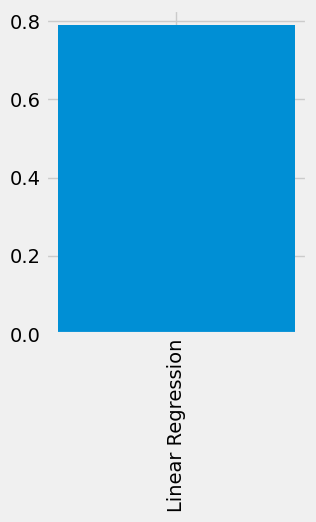

In [24]:
####Comparison of models
r2_score=np.array([.79])
labels=np.array(['Linear Regression'])
index=np.argsort(r2_score)
color=plt.cm.rainbow(np.linspace(0,1,4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(3,4)

plt.bar(range(len(index)),r2_score[index])
plt.xticks(range(0,1),['Linear Regression'],rotation=90)
plt.show()

# **b) By multi linear regression**

In [25]:
###splitting data
features = ["TV", "Radio", "Newspaper"]
X = sales[features]
target = "Sales"
y = sales[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
###build model
y_mean = y_train.mean()
print("Mean Error: ", y_mean)
y_pred_baseline = [y_mean] * len(y_train)
print("Baseline Error: ", y_pred_baseline[:5])

Mean Error:  14.1
Baseline Error:  [14.1, 14.1, 14.1, 14.1, 14.1]


In [27]:
#Model Instantiation
##multiple linear regression

model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [28]:
#Predicitions on Training Data
y_pred_training = model.predict(X_train)
print("Predicted values after model: ", y_pred_training[:5])

Predicted values after model:  [ 9.66090629 12.71390675 10.03913523  8.18094645 13.51401216]


In [29]:
#Predictions on Test Data
y_pred_test = model.predict(X_test)
print("Predicted values after model: ", y_pred_test[:5])

Predicted values after model:  [16.40149547 20.86584595 21.5692108  10.53639523 22.21229875]


In [30]:
# compare actual sales to predicted sales
compare= pd.DataFrame({"y_test":list(y_test), "pred":list(y_pred_test)})
compare.head()

,y_test,pred
0,16.9,16.401495
1,22.4,20.865846
2,21.4,21.569211
3,7.3,10.536395
4,24.7,22.212299


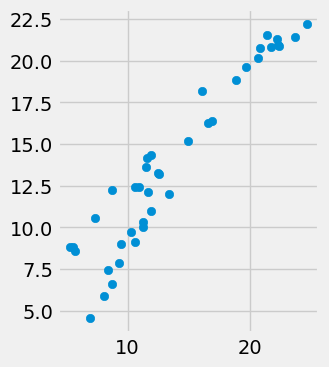

In [31]:
# plot of the comparison
plt.scatter(y_test, y_pred_test)

* **Model evaluation**

In [32]:
#model evaluation
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute error:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, y_pred_test)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, y_pred_test)
print("R2 Score:{}".format(R2))

Mean Absolute error:1.4572125083125194
Mean Squared error: 1.777702870555113
R2 Score:0.8998774499187093


In [33]:
#Model Evaluation
print("Score of training data: ", model.score(X_train, y_train))
print("Score of test data: ", model.score(X_train, y_train))

Score of training data:  0.8958638048835743
Score of test data:  0.8958638048835743


**Therefore, Sales prediction model is ready!!**